<a href="https://colab.research.google.com/github/a-cuc/CPE311/blob/main/Midterm%20Skills%20Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Submitted by: Angelo Luis C. Cu

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
census_income = fetch_ucirepo(id=20)

# data (as pandas dataframes)
X = census_income.data.features
y = census_income.data.targets

# metadata
print(census_income.metadata)

# variable information
print(census_income.variables)

{'uci_id': 20, 'name': 'Census Income', 'repository_url': 'https://archive.ics.uci.edu/dataset/20/census+income', 'data_url': 'https://archive.ics.uci.edu/static/public/20/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data.  Also known as Adult dataset.', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5GP7S', 'creators': ['Ron Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && 

In [3]:
import pandas as pd
import numpy as np

In [4]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [5]:
y

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


In [6]:
merged_census = pd.concat([X, y], axis = 1)
merged_census

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [7]:
# checks for duplicates
merged_census[merged_census.duplicated()].shape[0]

29

In [8]:
# removes duplicate rows
merged_census.drop_duplicates(inplace=True)

In [9]:
merged_census.info()
# it can be noticed that workclass, occupation, and native-country has missing data

<class 'pandas.core.frame.DataFrame'>
Index: 48813 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48813 non-null  int64 
 1   workclass       47850 non-null  object
 2   fnlwgt          48813 non-null  int64 
 3   education       48813 non-null  object
 4   education-num   48813 non-null  int64 
 5   marital-status  48813 non-null  object
 6   occupation      47847 non-null  object
 7   relationship    48813 non-null  object
 8   race            48813 non-null  object
 9   sex             48813 non-null  object
 10  capital-gain    48813 non-null  int64 
 11  capital-loss    48813 non-null  int64 
 12  hours-per-week  48813 non-null  int64 
 13  native-country  48539 non-null  object
 14  income          48813 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [10]:
# working with workclass first
merged_census.workclass.unique()
# it can be noticed that there are 2 missing values (? and NaN)

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked',
       nan], dtype=object)

In [11]:
# checking the frequency of the unique values
merged_census.workclass.value_counts()
# as Private is the most frequent, it would be more appropriate
# to change the missing values to Private in order for there to be
# less significant skewing of data

workclass
Private             33879
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [12]:
merged_census.workclass.fillna('Private', inplace=True)
merged_census.workclass.replace('?', 'Private', inplace=True)
merged_census

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,Private,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [13]:
merged_census.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [14]:
# working with occupation
merged_census.occupation.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv', nan], dtype=object)

In [15]:
merged_census.occupation.value_counts()
# as the data is more evenly distributed, I decided to use forward fill

occupation
Prof-specialty       6167
Craft-repair         6107
Exec-managerial      6084
Adm-clerical         5608
Sales                5504
Other-service        4919
Machine-op-inspct    3019
Transport-moving     2355
Handlers-cleaners    2071
?                    1843
Farming-fishing      1487
Tech-support         1445
Protective-serv       983
Priv-house-serv       240
Armed-Forces           15
Name: count, dtype: int64

In [16]:
merged_census.occupation.fillna(method='ffill', inplace=True)

In [18]:
merged_census.occupation.replace('?', method='ffill', inplace=True)
merged_census

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [19]:
# working with native-country
merged_census['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands', nan], dtype=object)

In [20]:
merged_census['native-country'].value_counts()
# as United-States is the most frequent,
# it is more appropriate to change the missing values
# to the United-States

native-country
United-States                 43810
Mexico                          947
?                               582
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [21]:
merged_census['native-country'].fillna('United-States', inplace=True)
merged_census['native-country'].replace('?', 'United-States', inplace=True)
merged_census

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [22]:
# it can be noticed that in income, the values are in the wrong format
merged_census.income.unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [23]:
# replacing the values to be more uniform
merged_census.income.replace('<=50K.', '<=50K', inplace=True)
merged_census.income.replace('>50K.', '>50K', inplace=True)

In [24]:
merged_census.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [25]:
merged_census.info()
# all missing data are handled

<class 'pandas.core.frame.DataFrame'>
Index: 48813 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48813 non-null  int64 
 1   workclass       48813 non-null  object
 2   fnlwgt          48813 non-null  int64 
 3   education       48813 non-null  object
 4   education-num   48813 non-null  int64 
 5   marital-status  48813 non-null  object
 6   occupation      48813 non-null  object
 7   relationship    48813 non-null  object
 8   race            48813 non-null  object
 9   sex             48813 non-null  object
 10  capital-gain    48813 non-null  int64 
 11  capital-loss    48813 non-null  int64 
 12  hours-per-week  48813 non-null  int64 
 13  native-country  48813 non-null  object
 14  income          48813 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [26]:
# as for now, I don't have any use for fnlwgt, capital-gain, and capital-loss,
# I decided to drop them
merged_census.drop(columns=['fnlwgt', 'capital-gain', 'capital-loss'], inplace=True)
merged_census

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,36,United-States,<=50K
48838,64,Private,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,40,United-States,<=50K
48839,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,50,United-States,<=50K
48840,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,40,United-States,<=50K


In [27]:
# converting the categorical data into numerical data
# as there is already education-num, which represents the education numerically
# we can already drop the education column
# but I want to have a dictionary of the corresponding values of the education

education_map = dict(zip(merged_census.education, merged_census['education-num']))

merged_census.drop(columns=['education'], inplace=True)
merged_census

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,13,Divorced,Prof-specialty,Not-in-family,White,Female,36,United-States,<=50K
48838,64,Private,9,Widowed,Prof-specialty,Other-relative,Black,Male,40,United-States,<=50K
48839,38,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,50,United-States,<=50K
48840,44,Private,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,40,United-States,<=50K


In [28]:
education_map

{'Bachelors': 13,
 'HS-grad': 9,
 '11th': 7,
 'Masters': 14,
 '9th': 5,
 'Some-college': 10,
 'Assoc-acdm': 12,
 'Assoc-voc': 11,
 '7th-8th': 4,
 'Doctorate': 16,
 'Prof-school': 15,
 '5th-6th': 3,
 '10th': 6,
 '1st-4th': 2,
 'Preschool': 1,
 '12th': 8}

In [29]:
# getting the unique values
columns = [
    'workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income'
] # columns to get the unique values
unique_values = []

# gets the unique values of a column and appends it to the unique_values list
for column in columns:
  unique_values.append(merged_census[column].unique().tolist())
unique_values

[['State-gov',
  'Self-emp-not-inc',
  'Private',
  'Federal-gov',
  'Local-gov',
  'Self-emp-inc',
  'Without-pay',
  'Never-worked'],
 ['Never-married',
  'Married-civ-spouse',
  'Divorced',
  'Married-spouse-absent',
  'Separated',
  'Married-AF-spouse',
  'Widowed'],
 ['Adm-clerical',
  'Exec-managerial',
  'Handlers-cleaners',
  'Prof-specialty',
  'Other-service',
  'Sales',
  'Craft-repair',
  'Transport-moving',
  'Farming-fishing',
  'Machine-op-inspct',
  'Tech-support',
  'Protective-serv',
  'Armed-Forces',
  'Priv-house-serv'],
 ['Not-in-family',
  'Husband',
  'Wife',
  'Own-child',
  'Unmarried',
  'Other-relative'],
 ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],
 ['Male', 'Female'],
 ['United-States',
  'Cuba',
  'Jamaica',
  'India',
  'Mexico',
  'South',
  'Puerto-Rico',
  'Honduras',
  'England',
  'Canada',
  'Germany',
  'Iran',
  'Philippines',
  'Italy',
  'Poland',
  'Columbia',
  'Cambodia',
  'Thailand',
  'Ecuador',
  'Laos',
  'Ta

In [30]:
# creates the dictionaries
result_dicts = [] # stores the results here

for data in unique_values:
  keys = [i for i in data]
  values = [i for i in range(1, len(data)+1)]
  result_dicts.append({keys[i] : values[i] for i in range(len(values))})
result_dicts

[{'State-gov': 1,
  'Self-emp-not-inc': 2,
  'Private': 3,
  'Federal-gov': 4,
  'Local-gov': 5,
  'Self-emp-inc': 6,
  'Without-pay': 7,
  'Never-worked': 8},
 {'Never-married': 1,
  'Married-civ-spouse': 2,
  'Divorced': 3,
  'Married-spouse-absent': 4,
  'Separated': 5,
  'Married-AF-spouse': 6,
  'Widowed': 7},
 {'Adm-clerical': 1,
  'Exec-managerial': 2,
  'Handlers-cleaners': 3,
  'Prof-specialty': 4,
  'Other-service': 5,
  'Sales': 6,
  'Craft-repair': 7,
  'Transport-moving': 8,
  'Farming-fishing': 9,
  'Machine-op-inspct': 10,
  'Tech-support': 11,
  'Protective-serv': 12,
  'Armed-Forces': 13,
  'Priv-house-serv': 14},
 {'Not-in-family': 1,
  'Husband': 2,
  'Wife': 3,
  'Own-child': 4,
  'Unmarried': 5,
  'Other-relative': 6},
 {'White': 1,
  'Black': 2,
  'Asian-Pac-Islander': 3,
  'Amer-Indian-Eskimo': 4,
  'Other': 5},
 {'Male': 1, 'Female': 2},
 {'United-States': 1,
  'Cuba': 2,
  'Jamaica': 3,
  'India': 4,
  'Mexico': 5,
  'South': 6,
  'Puerto-Rico': 7,
  'Honduras'

In [31]:
# maps the categorical data to their numerical counterparts
for column in range(len(columns)):
  merged_census.replace(result_dicts[column], inplace=True)

merged_census

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,1,13,1,1,1,1,1,40,1,1
1,50,2,13,2,2,2,1,1,13,1,1
2,38,3,9,3,3,1,1,1,40,1,1
3,53,3,7,2,3,2,2,1,40,1,1
4,28,3,13,2,4,3,2,2,40,2,1
...,...,...,...,...,...,...,...,...,...,...,...
48837,39,3,13,3,4,1,1,2,36,1,1
48838,64,3,9,7,4,6,2,1,40,1,1
48839,38,3,13,2,4,2,1,1,50,1,1
48840,44,3,13,3,1,4,3,1,40,1,1


In [73]:
merged_census.describe()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
count,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000
mean,38.647348,3.104419,10.078688,2.084322,5.276484,2.539037,1.220290,1.331510,40.425051,2.126073,1.239383
std,13.709005,0.917171,2.570257,1.257648,3.044477,1.440102,0.625738,0.470761,12.390954,4.782588,0.426711
min,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,28.000000,3.000000,9.000000,1.000000,2.000000,1.000000,1.000000,1.000000,40.000000,1.000000,1.000000
50%,37.000000,3.000000,10.000000,2.000000,5.000000,2.000000,1.000000,1.000000,40.000000,1.000000,1.000000
75%,48.000000,3.000000,12.000000,2.000000,7.000000,4.000000,1.000000,2.000000,45.000000,1.000000,1.000000
max,90.000000,8.000000,16.000000,7.000000,14.000000,6.000000,5.000000,2.000000,99.000000,41.000000,2.000000


In [74]:
# comparing easy to distinguish categories (sex and income)
male_census = merged_census.query('sex == 1')
female_census = merged_census.query('sex == 2')
less_than_census = merged_census.query('income == 1')
more_than_census = merged_census.query('income == 2')

In [78]:
male_census.mean()

age               39.497594
workclass          3.110570
education-num     10.095492
marital-status     1.928320
occupation         5.687383
relationship       2.262389
race               1.191107
sex                1.000000
hours-per-week    42.419264
native-country     2.118262
income             1.303883
dtype: float64

In [77]:
female_census.mean()

age               36.932827
workclass          3.092016
education-num     10.044803
marital-status     2.398900
occupation         4.447905
relationship       3.096898
race               1.279137
sex                2.000000
hours-per-week    36.403720
native-country     2.141824
income             1.109319
dtype: float64

In [ ]:
# on average, men are reported to be older than women
# men have also received slightly higher education than women
# men also work longer per week than women
# and men earn more than women
# women on the other hand are in their later stage of relationships compared to men

In [79]:
less_than_census.mean()

age               36.875916
workclass          3.053787
education-num      9.598901
marital-status     2.082660
occupation         5.412734
relationship       2.677063
race               1.242512
sex                1.388198
hours-per-week    38.842599
native-country     2.191419
income             1.000000
dtype: float64

In [80]:
more_than_census.mean()

age               44.275909
workclass          3.265297
education-num     11.603166
marital-status     2.089602
occupation         4.843560
relationship       2.100471
race               1.149679
sex                1.151391
hours-per-week    45.453145
native-country     1.918442
income             2.000000
dtype: float64

In [ ]:
# on average, people who earn more are older
# they also have higher educational attainment
# they also work longer hours

Plotting

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

<Axes: >

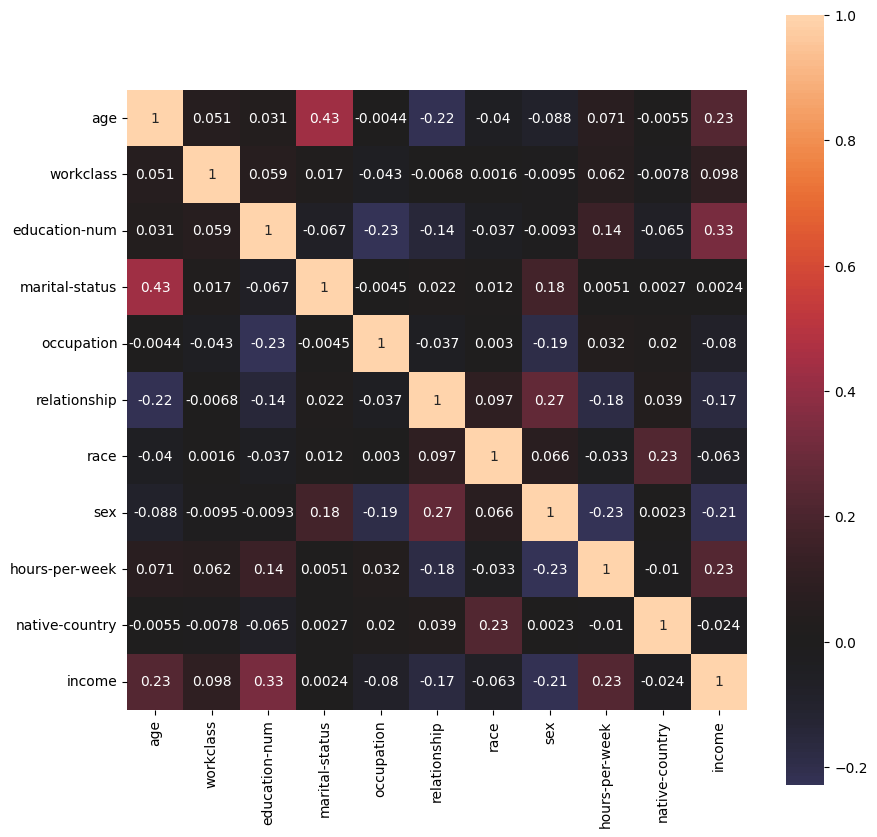

In [33]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(
    merged_census.sort_index().corr(),
    annot=True, center=0, square=True
)
# it can be noticed that there are notable correlations
# with marital status and age, education and income,
# race and native country, and hours per week and income

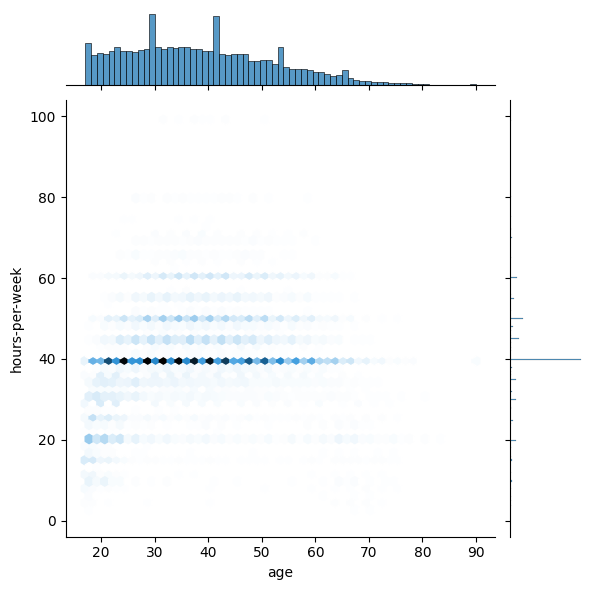

In [56]:
# as both age and hours-per-week are the only datapoints left that are non-categorical,
# I decided to graph them
sns.jointplot(
  x='age',
  y='hours-per-week',
  kind='hex', # hex plot
  data=merged_census
)
# it can then be noticed that there is a lot of people working 40 hours per week

In [38]:
# however, the data looks too small,
# therefore I decided to get a sample of 500
census_sample = merged_census.sample(n=500, random_state=0)
census_sample

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
2293,52,3,10,2,7,2,1,1,40,1,2
7348,25,1,10,2,5,3,1,2,15,1,1
40927,28,3,9,2,7,2,1,1,40,1,2
22311,19,3,9,1,5,4,2,2,40,1,1
44795,29,3,4,2,7,2,1,1,40,23,2
...,...,...,...,...,...,...,...,...,...,...,...
24803,18,3,9,1,1,4,1,2,20,1,1
13739,21,3,10,1,6,4,2,2,20,1,1
43071,32,2,9,2,7,2,1,1,32,1,1
28013,19,3,10,1,2,4,1,2,40,1,1


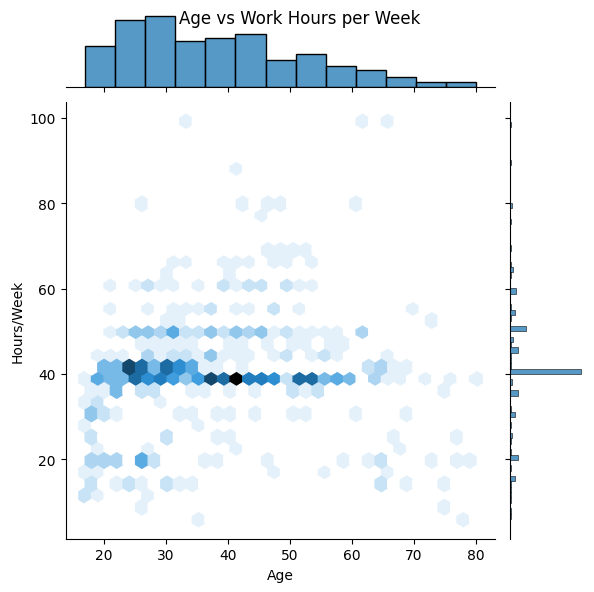

In [70]:
sns.jointplot(
  x='age',
  y='hours-per-week',
  kind='hex', # hex plot
  data=census_sample,
)
plt.xlabel('Age')
plt.ylabel('Hours/Week')
plt.suptitle('Age vs Work Hours per Week')
# it can be seen that most of the data is at around
# age 20-50 and are working 20-60 hours per week
plt.savefig('age_hours-week.png')

In [85]:
a = male_census.agg({
    'age' : 'mean',
    'education-num' : 'mean',
    'hours-per-week' : 'mean',
    'income' : 'mean',
    'marital-status' : 'mean'
})
a

age               39.497594
education-num     10.095492
hours-per-week    42.419264
income             1.303883
marital-status     1.928320
dtype: float64

In [86]:
b = female_census.agg({
    'age' : 'mean',
    'education-num' : 'mean',
    'hours-per-week' : 'mean',
    'income' : 'mean',
    'marital-status' : 'mean'
})
b

age               36.932827
education-num     10.044803
hours-per-week    36.403720
income             1.109319
marital-status     2.398900
dtype: float64

In [91]:
by_sex_census = pd.concat([a, b], axis = 1)
by_sex_census

,0,1
age,39.497594,36.932827
education-num,10.095492,10.044803
hours-per-week,42.419264,36.403720
income,1.303883,1.109319
marital-status,1.928320,2.398900


In [114]:
by_sex_census.rename(columns={0 : 'male', 1 : 'female'}, inplace=True)
by_sex_census.index=['Age', 'Education', 'Hours/Week', 'Income', 'Marital Status']
by_sex_census

,male,female
Age,39.497594,36.932827
Education,10.095492,10.044803
Hours/Week,42.419264,36.403720
Income,1.303883,1.109319
Marital Status,1.928320,2.398900


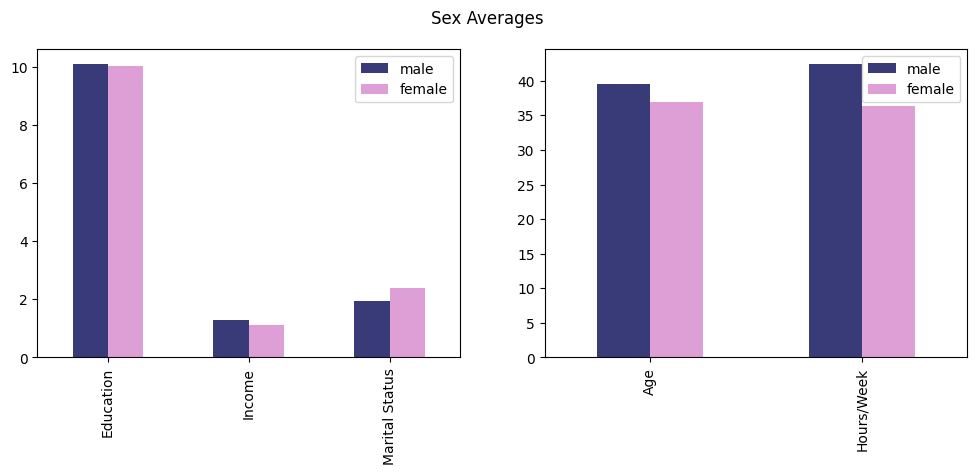

In [119]:
# creating the bar plot
low_values = by_sex_census.iloc[[1,3,4]]
high_values = by_sex_census.iloc[[0,2]]

fig, (ax_low, ax_high) = plt.subplots(1, 2, figsize=(12, 4))

low_values.plot(
    kind='bar',
    cmap='tab20b',
    ax=ax_low
)

high_values.plot(
    kind='bar',
    cmap='tab20b',
    ax=ax_high
)
fig.suptitle('Sex Averages')

plt.savefig('sex_average.png')

In [92]:
c = less_than_census.agg({
    'age' : 'mean',
    'education-num' : 'mean',
    'hours-per-week' : 'mean',
})
c

age               36.875916
education-num      9.598901
hours-per-week    38.842599
dtype: float64

In [93]:
d = more_than_census.agg({
    'age' : 'mean',
    'education-num' : 'mean',
    'hours-per-week' : 'mean',
})
d

age               44.275909
education-num     11.603166
hours-per-week    45.453145
dtype: float64

In [95]:
by_income_census = pd.concat([c, d], axis = 1)
by_income_census

,0,1
age,36.875916,44.275909
education-num,9.598901,11.603166
hours-per-week,38.842599,45.453145


In [112]:
by_income_census.rename(columns={0 : '<=50K', 1 : '>50K'}, inplace=True)
by_income_census.index = ['Age', 'Education', 'Hours/Week']
by_income_census

,<=50K,>50K
Age,36.875916,44.275909
Education,9.598901,11.603166
Hours/Week,38.842599,45.453145


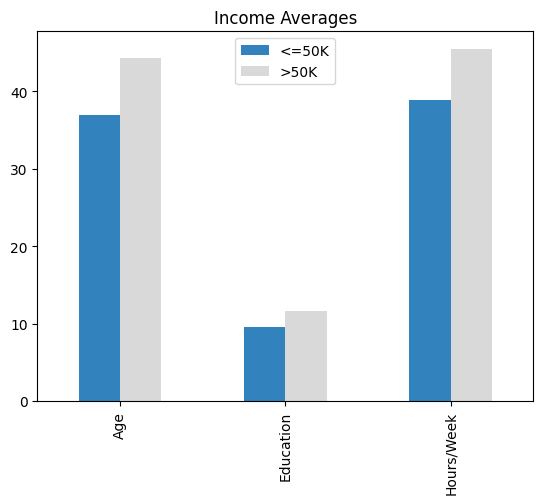

In [117]:
# creating the bar plot
by_income_census.plot(
    kind='bar',
    cmap = 'tab20c',
    title = 'Income Averages'
)
plt.savefig('income_average.png')